## 1. 데이터 불러오기 및 기본 정보 확인

#### 1-1. 데이터 불러오기

In [427]:
# 데이터 불러오기
import pandas as pd
from pathlib import Path

# === CSV 경로 설정 ===
DATA_PATH = Path("train.csv")
 
# 파일 존재 확인
if not DATA_PATH.exists():
    raise FileNotFoundError(f"파일을 찾을 수 없습니다: {DATA_PATH.resolve()}")

# 읽어오기
df = pd.read_csv(DATA_PATH)

---

#### 1-2. 데이터 구조 확인

shape 속성을 이용하면 데이터프레임의 행(row)과 열(column) 개수를 확인할 수 있다.

In [428]:
print("- shape :", df.shape)                 

- shape : (891, 12)


info() 메서드를 이용하면 데이터프레임의 전체 구조를 요약 확인할 수 있다. (행 개수, 컬럼 이름, 데이터 타입, 결측치 개수, 메모리 사용량 등)

In [429]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


이 데이터셋은 891행 12열로 구성되어 있으며, 정수형 5개, 실수형 2개, 문자형 5개의 컬럼을 포함하고 있다.  
Age, Cabin, Embarked 열에는 결측치가 존재하며, 나머지 열은 모두 값이 채워져 있다. 전체 데이터 크기는 약 83.7KB로 작은 편이다.

---

#### 1-3. 데이터 요약 통계 확인


In [430]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [431]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


`describe()` 메서드는 기본적으로 **수치형 컬럼**에 대한 요약 통계를 제공하며, `include='object'` 옵션을 주면 **범주형(object)** 컬럼에 대한 통계도 확인할 수 있다.

다만, `describe()`는 **데이터 타입(dtype)** 에만 의존하여 동작하기 때문에 해석 시 주의가 필요하다.

* `int`, `float` → 수치형 통계 (count, mean, std, min, 25%, 50%, 75%, max)
* `object`, `category` → 범주형 통계 (count, unique, top, freq)

문제는, 실제로는 **숫자형이지만 범주형 의미를 가진 컬럼**(예: `Survived`, `Pclass`)도 단순히 수치형으로 분류되어 평균이나 표준편차가 출력된다. 반대로, **단순 식별자 컬럼**(예: `PassengerId`, `Ticket`)은 수치형으로 인식되지만, 통계적으로는 의미 없는 값이므로 결과 해석에서 혼동을 줄 수 있다.

따라서 `describe()` 결과를 해석할 때는 데이터에 대한 **도메인 지식**을 반영하여, 실제 의미에 맞게 수치형과 범주형을 구분하는 것이 중요하다.

(참고) 아래 코드는 도메인 지식을 반영하여, 단순 식별자처럼 의미 없는 컬럼(PassengerId)은 제외하고, 실제로는 범주형 의미를 갖는 컬럼(Survived, Pclass)을 수치형이 아닌 범주형으로 조정한 뒤 요약 통계를 확인한 결과이다.

In [432]:
import numpy as np

# describe 출력용 수치형/범주형 분류
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# 도메인 지식 기반으로 강제 조정
force_cat = ["Survived", "Pclass", "PassengerId"]  # Survived/Pclass는 범주형으로, PassengerId는 아예 제외
cat_cols = list(set(cat_cols + ["Survived", "Pclass"]))   # Survived, Pclass를 범주형으로 이동
num_cols = [c for c in num_cols if c not in force_cat]    # PassengerId, Survived, Pclass 제거

In [433]:
print("[수치형 통계 요약]")
df[num_cols].describe()

[수치형 통계 요약]


,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [434]:
print("[범주형 통계 요약]")
df[cat_cols].astype("object").describe()

[범주형 통계 요약]


,Ticket,Survived,Embarked,Pclass,Name,Cabin,Sex
count,891,891,889,891,891,204,891
unique,681,2,3,3,891,147,2
top,347082,0,S,3,"Braund, Mr. Owen Harris",G6,male
freq,7,549,644,491,1,4,577


---

## 2. 데이터 이해

#### 2-1. 컬럼별 의미 설명

다음은 데이터프레임의 전체 컬럼 이름을 리스트로 출력하는 코드이다.

In [435]:
print("columns :", df.columns.tolist())    

columns : ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


| 컬럼명             | 설명                                                           | 데이터 타입(dtype) | 구분(수치형/범주형) |
| --------------- | ------------------------------------------------------------ | ------------- | ----------- |
| **PassengerId** | 승객 고유 ID (단순 번호, 분석에는 크게 의미 없음)                              | int64         | 수치형(식별자)    |
| **Survived**    | 생존 여부 (타깃 변수) → `0 = 사망`, `1 = 생존`                           | int64         | **범주형**     |
| **Pclass**      | 선실 등급 (사회적/경제적 지위 지표) → `1 = 1등석`, `2 = 2등석`, `3 = 3등석`      | int64         | **범주형**     |
| **Name**        | 승객 이름 (이름, 성, 호칭(title) 포함. Feature Engineering에서 활용 가능)     | object        | 범주형         |
| **Sex**         | 성별 (`male`, `female`)                                        | object        | 범주형         |
| **Age**         | 나이 (일부 결측치 존재)                                               | float64       | 수치형         |
| **SibSp**       | 함께 탑승한 형제/자매(sibling) + 배우자(spouse) 수                        | int64         | 수치형         |
| **Parch**       | 함께 탑승한 부모(parent) + 자녀(children) 수                           | int64         | 수치형         |
| **Ticket**      | 티켓 번호 (패턴 추출 가능하나 일반적으로는 크게 사용하지 않음)                         | object        | 범주형         |
| **Fare**        | 운임 요금 (탑승 등급/선실 위치와 관련)                                      | float64       | 수치형         |
| **Cabin**       | 선실 번호 (결측치 많음. 선실의 앞 글자 = 구역 정보로 활용 가능)                      | object        | 범주형         |
| **Embarked**    | 탑승 항구 → `C = Cherbourg`, `Q = Queenstown`, `S = Southampton` | object        | 범주형         |


---
#### 2-2 결측치 확인

데이터프레임의 각 컬럼별 결측치 개수(missing_num)와 결측치 비율(missing_pct)을 계산해, 결측치가 많은 순서대로 정리하는 코드

In [436]:
print("[결측치 요약]")

# 각 컬럼별 결측치 개수를 구하고 정리
missing = (
    df.isna()                               # 각 셀마다 결측치면 True, 아니면 False 반환
      .sum()                                # 컬럼별로 True 개수 합산 → 컬럼별 결측치 개수
      .rename("missing_num")                # 결과 Series 이름을 "missing_num"으로 바꿔줌
      .to_frame()                           # Series → DataFrame으로 변환 (컬럼명 : missing_num)
)

# 결측치 비율(%) 컬럼 추가
missing["missing_pct"] = (missing["missing_num"] / len(df) * 100).round(2)  # 전체 행 개수 대비 결측치 비율 계산 (소수 둘째자리 반올림)

# 결측치 개수가 많은 순으로 정렬해서 출력
print(missing.sort_values("missing_num", ascending=False))  # missing_num 기준 내림차순 정렬 후 출력

[결측치 요약]
             missing_num  missing_pct
Cabin                687        77.10
Age                  177        19.87
Embarked               2         0.22
PassengerId            0         0.00
Name                   0         0.00
Pclass                 0         0.00
Survived               0         0.00
Sex                    0         0.00
Parch                  0         0.00
SibSp                  0         0.00
Fare                   0         0.00
Ticket                 0         0.00


Cabin : 결측치 687건 (77.1%) → 데이터의 3/4 이상 비어 있음 → 그대로 쓰기 어렵고, 보통 “결측 처리/특정 정보만 추출(앞 글자)”로 활용

Age : 결측치 177건 (19.9%) → 약 20% 비어 있음 → 평균/중앙값 대체 or 모델 기반 보간 필요

Embarked : 결측치 2건 (0.22%) → 거의 없음 → 최빈값 등으로 쉽게 대체 가능

나머지 컬럼 : 결측치 없음

---

#### 2-3 중복 데이터 여부 확인

In [437]:
print("[중복 확인]")

# 전체 데이터에서 완전히 같은 행(모든 컬럼 값이 동일)의 개수를 확인
dup_rows = df.duplicated().sum()
print(f"전체 중복 행 수 : {dup_rows}")

print("\n[PassengerId 제외한 중복 확인]")

if "PassengerId" in df.columns:
    # PassengerId 컬럼을 제외하고 중복 확인
    dup_except_id = df.drop(columns=["PassengerId"]).duplicated().sum()
    print(f"PassengerId 제외 시 중복 행 수 : {dup_except_id}")

    if dup_except_id > 0:
        print("\n[중복된 데이터 샘플]")
        print(df.drop(columns=["PassengerId"])[df.drop(columns=["PassengerId"]).duplicated(keep=False)].head())

print("\n[티켓번호 + 이름 중복 확인]")

# Ticket과 Name 컬럼이 모두 존재할 경우에만 실행
if set(["Ticket", "Name"]).issubset(df.columns):
    # Ticket + Name 조합이 중복된 행 개수 계산
    dup_ticket_name = df.duplicated(subset=["Ticket", "Name"]).sum()
    print(f"Ticket + Name이 동시에 중복된 행 수 : {dup_ticket_name}")

    # 중복된 데이터가 실제로 있다면 샘플로 몇 개 출력
    if dup_ticket_name > 0:
        print("\n[중복된 데이터 샘플]")
        # keep=False → 중복된 행 전체를 표시 (첫 번째만 제외하지 않음)
        print(df[df.duplicated(subset=["Ticket", "Name"], keep=False)].head())

[중복 확인]
전체 중복 행 수 : 0

[PassengerId 제외한 중복 확인]
PassengerId 제외 시 중복 행 수 : 0

[티켓번호 + 이름 중복 확인]
Ticket + Name이 동시에 중복된 행 수 : 0


본 데이터셋에는 단순히 순번을 매긴 `PassengerId` 컬럼이 존재하므로, 모든 컬럼이 완전히 동일한 중복 행은 나타날 수 없다.  
따라서 본 프로젝트에서는 `PassengerId`를 제외한 나머지 컬럼을 기준으로 중복 여부를 확인하였다.  
또한, `Ticket`과 `Name`이 동시에 중복되는 경우 동일 인물일 가능성이 있어 추가로 확인했으나, 해당 사례는 존재하지 않는 것으로 확인되었다.

---

## 3. 데이터 분포 확인 

#### 3-1. 타깃 데이터 분포

In [438]:
print("[타깃 분포]")

# 타깃 컬럼이 데이터에 존재할 때만 실행
if "Survived" in df.columns:
    # 각 클래스(0: 사망, 1: 생존)의 개수 세기
    # dropna=False → 결측치(NaN)가 있으면 그것도 개수에 포함 (데이터 품질 점검을 위해)
    print(df["Survived"].value_counts(dropna=False))

    print("\n[타깃 분포 비율]")
    # 각 클래스의 상대적 비율 계산
    # normalize=True → 전체 대비 비율 반환 (합계 = 1)
    # round(3) → 소수점 셋째 자리까지 반올림
    print(df["Survived"].value_counts(normalize=True).round(3))

[타깃 분포]
Survived
0    549
1    342
Name: count, dtype: int64

[타깃 분포 비율]
Survived
0    0.616
1    0.384
Name: proportion, dtype: float64


[타깃 분포 시각화]


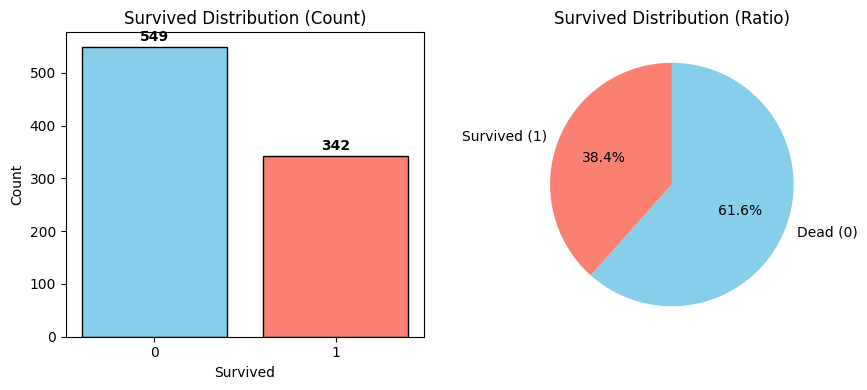

In [439]:
import matplotlib.pyplot as plt

print("[타깃 분포 시각화]")

if "Survived" in df.columns:
    counts = df["Survived"].value_counts().sort_index()             # 클래스 개수 (0, 1 순서 정렬)
    ratios = df["Survived"].value_counts(normalize=True).sort_index()  # 클래스 비율

    # subplot 생성 (1행 2열)
    fig, axes = plt.subplots(1, 2, figsize=(9, 4))

    # --- (1) 막대그래프 (개수) ---
    colors = ["skyblue", "salmon"]  # 클래스별 색상 통일
    bars = axes[0].bar(counts.index.astype(str), counts.values, color=colors, edgecolor="black")
    axes[0].set_title("Survived Distribution (Count)")
    axes[0].set_xlabel("Survived")
    axes[0].set_ylabel("Count")

    # 막대 위에 숫자 표시
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2, height + 5, str(height),
                     ha="center", va="bottom", fontsize=10, fontweight="bold")

    # --- (2) 파이차트 (비율) ---
    axes[1].pie(
        ratios.values,
        labels=["Dead (0)", "Survived (1)"],
        autopct="%.1f%%",           # 퍼센트 표시
        colors=colors,              # 막대그래프와 동일 색상
        startangle=90,
        counterclock=False
    )
    axes[1].set_title("Survived Distribution (Ratio)")

    plt.tight_layout()
    plt.show()


분석 결과, 타이타닉 승객의 약 62%가 사망했고 38%가 생존했으며, 데이터는 다소 불균형하지만 심각한 수준은 아니다.

---

#### 3-2. 범주형 컬럼 분포

In [440]:
print("[범주형 분포 분석]")

# 분석할 범주형 컬럼 목록 (데이터에 존재하는 경우만)
cat_cols = [c for c in ["Pclass", "Sex", "Embarked"] if c in df.columns]

for c in cat_cols:
    print(f"\n=== {c} 분포 ===")

    # 각 카테고리 개수 세기
    # dropna=False → 결측치(NaN) 포함 (데이터 품질 점검용)
    print("[개수]")
    print(df[c].value_counts(dropna=False))

    # 각 카테고리 비율 계산
    # normalize=True → 비율 계산, round(3) → 소수점 셋째 자리 반올림
    print("\n[비율]")
    print(df[c].value_counts(normalize=True, dropna=False).round(3))


[범주형 분포 분석]

=== Pclass 분포 ===
[개수]
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

[비율]
Pclass
3    0.551
1    0.242
2    0.207
Name: proportion, dtype: float64

=== Sex 분포 ===
[개수]
Sex
male      577
female    314
Name: count, dtype: int64

[비율]
Sex
male      0.648
female    0.352
Name: proportion, dtype: float64

=== Embarked 분포 ===
[개수]
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

[비율]
Embarked
S      0.723
C      0.189
Q      0.086
NaN    0.002
Name: proportion, dtype: float64


[범주형 분포 시각화]

=== Pclass 분포 시각화 ===


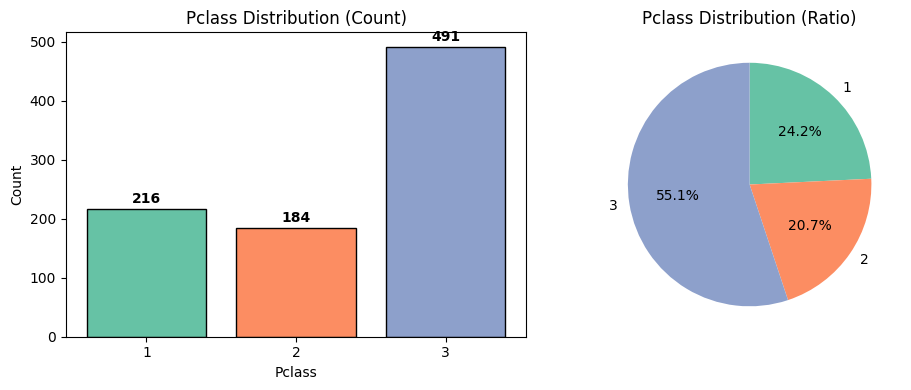


=== Sex 분포 시각화 ===


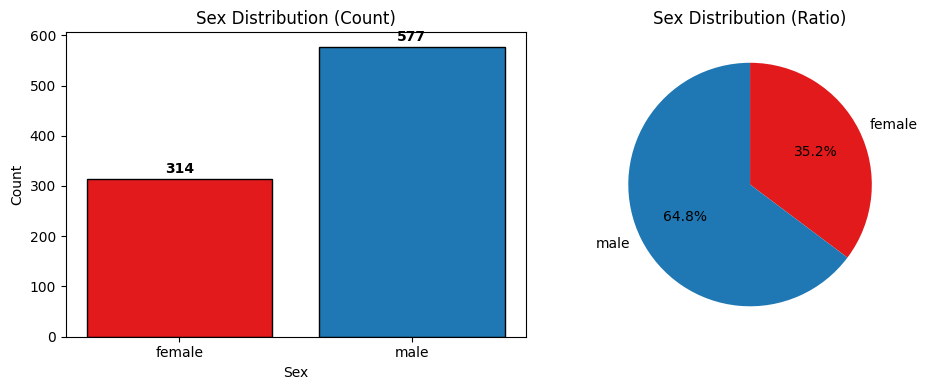


=== Embarked 분포 시각화 ===


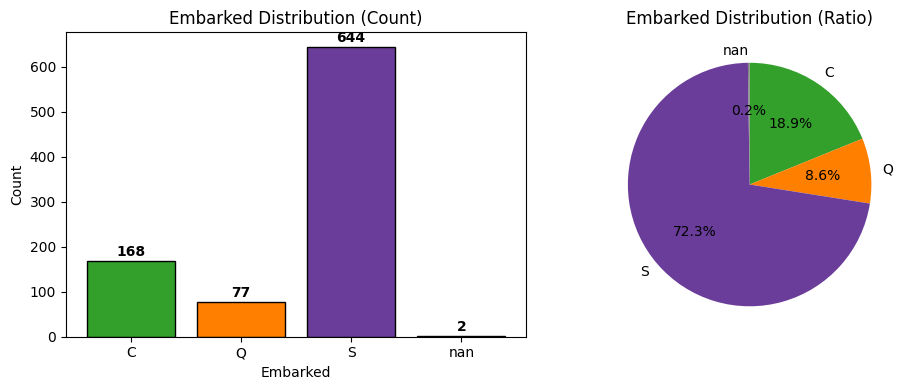

In [441]:
import matplotlib.pyplot as plt

print("[범주형 분포 시각화]")

# 분석할 범주형 컬럼 목록
cat_cols = [c for c in ["Pclass", "Sex", "Embarked"] if c in df.columns]

# 컬럼별 색상 매핑 사전
color_maps = {
    "Pclass": {1: "#66c2a5", 2: "#fc8d62", 3: "#8da0cb"},
    "Sex": {"male": "#1f78b4", "female": "#e31a1c"},
    "Embarked": {"C": "#33a02c", "Q": "#ff7f00", "S": "#6a3d9a", np.nan: "gray"}
}

for c in cat_cols:
    print(f"\n=== {c} 분포 시각화 ===")
    
    counts = df[c].value_counts(dropna=False).sort_index()
    ratios = df[c].value_counts(normalize=True, dropna=False).sort_index()

    # 색상 매핑 (counts 인덱스 순서에 맞춰 색상 리스트 생성)
    colors = [color_maps[c][val] for val in counts.index]

    # subplot 생성 (1행 2열)
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # --- (1) 막대그래프 (개수) ---
    bars = axes[0].bar(counts.index.astype(str), counts.values,
                       color=colors, edgecolor="black")
    axes[0].set_title(f"{c} Distribution (Count)")
    axes[0].set_xlabel(c)
    axes[0].set_ylabel("Count")

    # 막대 위에 숫자 표시
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2, height + 5, str(height),
                     ha="center", va="bottom", fontsize=10, fontweight="bold")

    # --- (2) 파이차트 (비율) ---
    axes[1].pie(
        ratios.values,
        labels=ratios.index.astype(str),
        autopct="%.1f%%",
        colors=colors,              # 막대그래프와 동일 색상
        startangle=90,
        counterclock=False
    )
    axes[1].set_title(f"{c} Distribution (Ratio)")

    plt.tight_layout()
    plt.show()


---

#### 3-3. 수치형 컬럼 분포

In [442]:
import numpy as np

print("[수치형 분포 분석]")

# 수치형 컬럼 추출 (타깃과 ID 제외)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ["Survived", "PassengerId"]
num_cols = [c for c in num_cols if c not in exclude_cols]

# 1) 결측치 개수와 비율
print("\n[결측치 요약]")
missing = (
    df[num_cols].isna()
      .sum()
      .rename("missing_num")
      .to_frame()
)
missing["missing_pct"] = (missing["missing_num"] / len(df) * 100).round(2)
print(missing)

# 2) describe로 요약 통계
print("\n[수치형 요약 통계]")
df[num_cols].describe().round(3)

[수치형 분포 분석]

[결측치 요약]
        missing_num  missing_pct
Pclass            0         0.00
Age             177        19.87
SibSp             0         0.00
Parch             0         0.00
Fare              0         0.00

[수치형 요약 통계]


,Pclass,Age,SibSp,Parch,Fare
count,891.000,714.000,891.000,891.000,891.000
mean,2.309,29.699,0.523,0.382,32.204
std,0.836,14.526,1.103,0.806,49.693
min,1.000,0.420,0.000,0.000,0.000
25%,2.000,20.125,0.000,0.000,7.910
50%,3.000,28.000,0.000,0.000,14.454
75%,3.000,38.000,1.000,0.000,31.000
max,3.000,80.000,8.000,6.000,512.329


[Numeric Features Distribution - Count vs Treemap with small text fix]


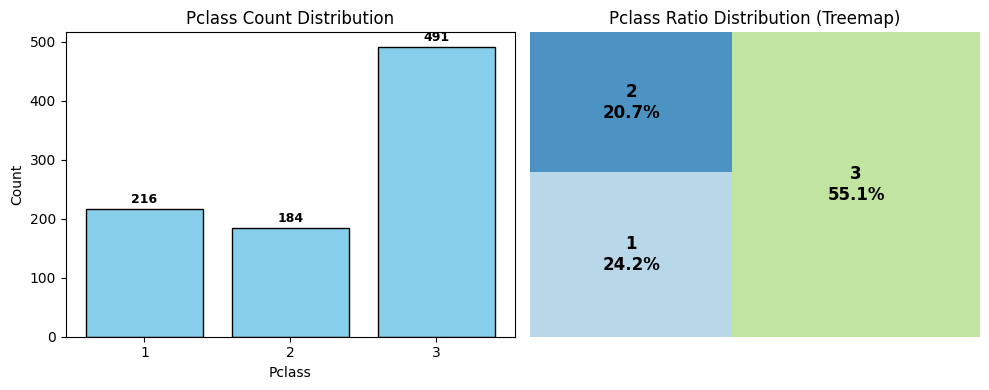

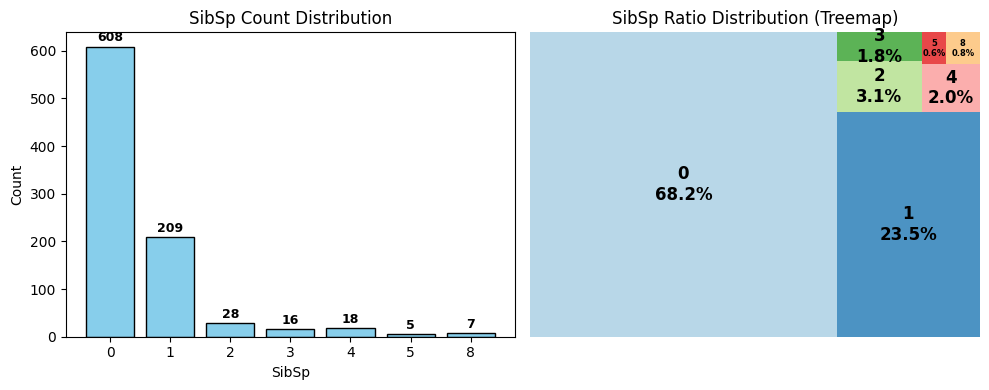

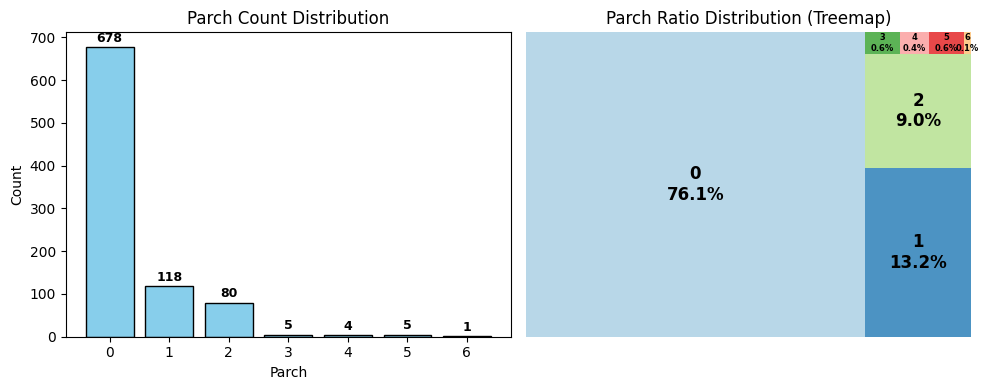

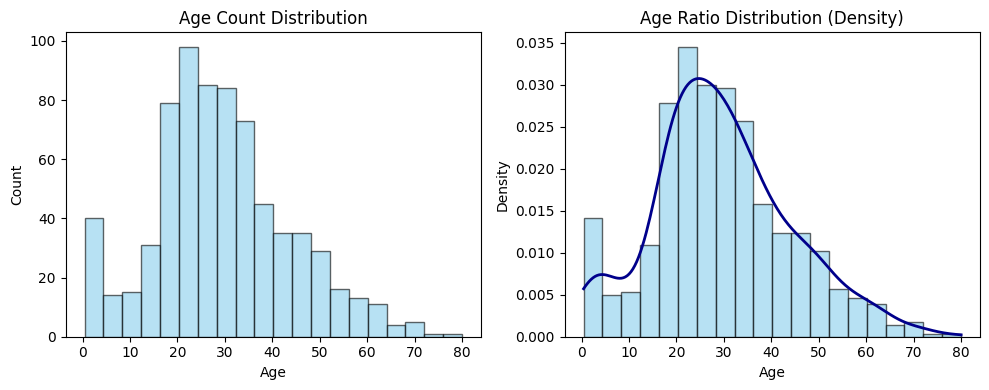

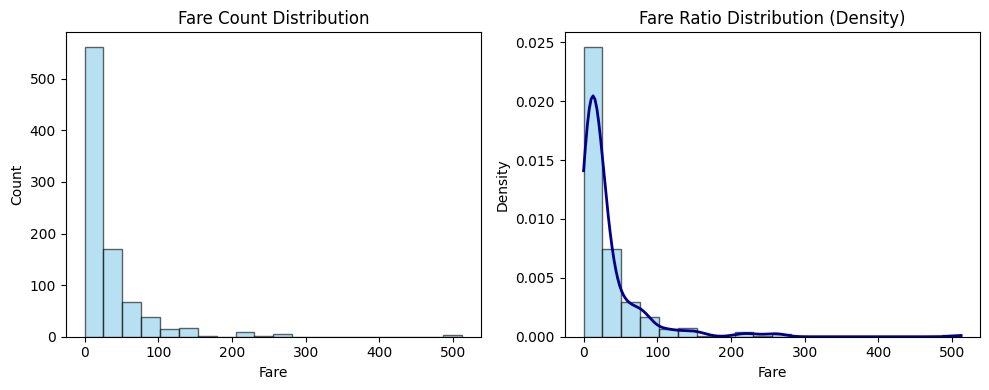

In [443]:
import matplotlib.pyplot as plt
import squarify
import numpy as np
from scipy.stats import gaussian_kde

print("[Numeric Features Distribution - Count vs Treemap with small text fix]")

# 수치형 컬럼 추출 (타깃과 ID 제외)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ["Survived", "PassengerId"]
num_cols = [c for c in num_cols if c not in exclude_cols]

# 연속형 / 이산형 변수 구분
continuous_cols = ["Age", "Fare"]  # 연속형
discrete_cols = [c for c in num_cols if c not in continuous_cols]  # 이산형

# --- 이산형 변수 시각화 ---
for c in discrete_cols:
    counts = df[c].value_counts(dropna=False).sort_index()
    ratios = df[c].value_counts(normalize=True, dropna=False).sort_index()

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # (1) Count plot (막대그래프)
    bars = axes[0].bar(counts.index.astype(str), counts.values, color="skyblue", edgecolor="black")
    for i, v in enumerate(counts.values):
        axes[0].text(i, v + 5, str(v), ha="center", va="bottom", fontsize=9, fontweight="bold")
    axes[0].set_title(f"{c} Count Distribution")
    axes[0].set_xlabel(c)
    axes[0].set_ylabel("Count")

    # (2) Treemap (비율, 작은 값은 글씨 축소)
    labels = [f"{idx}\n{val:.1%}" for idx, val in zip(ratios.index, ratios.values)]
    squarify.plot(
        sizes=ratios.values,
        label=labels,
        color=plt.cm.Paired.colors[:len(ratios)],
        alpha=0.8,
        ax=axes[1],
        text_kwargs={'fontsize': 12, 'weight': 'bold'}
    )
    # 1% 이하 값만 글씨 크기 줄이기
    for t, val in zip(axes[1].texts, ratios.values):
        if val < 0.01:
            t.set_fontsize(6)   # 작은 글씨
            t.set_color("black")

    axes[1].set_title(f"{c} Ratio Distribution (Treemap)")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

# --- 연속형 변수 시각화 ---
for c in continuous_cols:
    data = df[c].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # (1) Histogram (빈도수)
    axes[0].hist(data, bins=20, color="skyblue", edgecolor="black", alpha=0.6)
    axes[0].set_title(f"{c} Count Distribution")
    axes[0].set_xlabel(c)
    axes[0].set_ylabel("Count")

    # (2) Histogram (밀도 + KDE 추세선)
    axes[1].hist(data, bins=20, density=True, color="skyblue", edgecolor="black", alpha=0.6)
    kde = gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 200)
    axes[1].plot(x_vals, kde(x_vals), color="darkblue", linewidth=2)
    axes[1].set_title(f"{c} Ratio Distribution (Density)")
    axes[1].set_xlabel(c)
    axes[1].set_ylabel("Density")

    plt.tight_layout()
    plt.show()


---

## 4. 심층 데이터 분석

#### 4-1 데이터 전처리

In [444]:
# 원본 보존을 위해 복사본 생성

df_prep = df.copy()

#### 🧹 결측치 처리

Age : 중앙값 / 그룹별 평균으로 대체  
Embarked : 최빈값 대체
Cabin : 결측률이 높으므로 결측 여부만 이진 변수로 활용

In [445]:
print("[결측치 처리]")

# Age: 중앙값으로 대체
if "Age" in df_prep.columns:
    age_median = df_prep["Age"].median()
    df_prep["Age"] = df_prep["Age"].fillna(age_median)
    print(f"- Age 결측치 {age_median} (중앙값)으로 대체")

# Embarked: 최빈값으로 대체
if "Embarked" in df_prep.columns:
    embarked_mode = df_prep["Embarked"].mode()[0]
    df_prep["Embarked"] = df_prep["Embarked"].fillna(embarked_mode)
    print(f"- Embarked 결측치 '{embarked_mode}' (최빈값)으로 대체")

# Cabin: "Missing"으로 대체
if "Cabin" in df_prep.columns:
    df_prep["Cabin"] = df_prep["Cabin"].fillna("Missing")
    print("- Cabin 결측치는 'Missing'으로 대체")

print("\n[결측치 처리 후 요약]")
print(df_prep.isnull().sum())

[결측치 처리]
- Age 결측치 28.0 (중앙값)으로 대체
- Embarked 결측치 'S' (최빈값)으로 대체
- Cabin 결측치는 'Missing'으로 대체

[결측치 처리 후 요약]
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


#### ⚠️ 이상치 처리

Fare : 최대 512.3과 같은 고가 요금으로 인해 분포가 왜곡됨 → 데이터분에서는 구간화(binning)로 분포를 안정화하고, 머신러닝 모델링 시에는 로그 변환으로 이상치 영향을 완화함

Age : 대부분 0세~80세 사이에 분포하며, 특별한 극단값은 없음 → 이상치 처리는 필요하지 않으며, 대신 결측치 보완(중앙값/그룹별 평균)과 연령대 구간화(Child, Adult, Senior 등)로 활용하는 경우가 많음

SibSp, Parch : 값이 한쪽으로 치우쳐 있으나 이는 데이터 특성(가족 규모가 작은 승객이 대부분)을 반영하는 것일 뿐 이상치로 보긴 어려움 → 보통 두 변수를 합쳐 FamilySize 같은 파생 변수를 만들어 분석에 활용함

In [446]:
print("[이상치 처리 - Fare 해석 중심 구간화]")

if "Fare" in df_prep.columns:
    # 구간 정의
    bins = [0, 10, 50, 100, df_prep["Fare"].max()]
    labels = ["L", "M", "H", "VH"]
    
    # 구간화 적용
    df_prep["Fare_bin"] = pd.cut(df_prep["Fare"], bins=bins, labels=labels, include_lowest=True)
    
    # 구간별 요약 출력 (observed=True 추가)
    bin_summary = df_prep.groupby("Fare_bin", observed=True)["Fare"].agg(["min", "max", "count"])
    print(bin_summary)


[이상치 처리 - Fare 해석 중심 구간화]
               min       max  count
Fare_bin                           
L           0.0000    9.8458    336
M          10.1708   50.0000    395
H          50.4958   93.5000    107
VH        106.4250  512.3292     53


#### 🧩 파생 변수 생성

FamilySize : SibSp(형제/배우자 수)와 Parch(부모/자녀 수)를 합산하고 본인을 포함하여 계산 → FamilySize = SibSp + Parch + 1. 가족 규모가 생존율에 영향을 줄 수 있어 자주 활용됨

IsAlone : FamilySize가 1인 경우 혼자인 승객 여부를 나타내는 변수. 독립적으로 생존율과 밀접한 연관이 있어 분석에 유용함

Title : Name 변수에서 추출한 호칭(Mr, Mrs, Miss, Master 등). 승객의 성별, 나이, 사회적 지위를 반영하여 생존율과의 관계를 설명하는 데 효과적임

Age_bin : Age를 연령대 구간(Child, Teen, YoungAdult, Adult, Senior)으로 나눈 변수. 연령대별 생존율 차이를 확인하는 데 유용하게 활용됨

In [447]:
print("[파생 변수 생성]")

# FamilySize = SibSp + Parch + 1
if "SibSp" in df_prep.columns and "Parch" in df_prep.columns:
    df_prep["FamilySize"] = df_prep["SibSp"] + df_prep["Parch"] + 1
    print("- FamilySize 변수 생성 (SibSp + Parch + 1)")

# IsAlone = (FamilySize == 1)
if "FamilySize" in df_prep.columns:
    df_prep["IsAlone"] = (df_prep["FamilySize"] == 1).astype(int)
    print("- IsAlone 변수 생성 (혼자 탑승 여부)")

# Title = Name에서 추출 (raw string 사용)
if "Name" in df_prep.columns:
    df_prep["Title"] = df_prep["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)
    print("- Title 변수 생성 (Name에서 호칭 추출)")

# Age_bin = Age 구간화
if "Age" in df_prep.columns:
    bins = [0, 12, 18, 30, 50, 80]
    labels = ["Child", "Teen", "YoungAdult", "Adult", "Senior"]
    df_prep["Age_bin"] = pd.cut(df_prep["Age"], bins=bins, labels=labels, include_lowest=True)
    print("- Age_bin 변수 생성 (연령대 구간화)")


[파생 변수 생성]
- FamilySize 변수 생성 (SibSp + Parch + 1)
- IsAlone 변수 생성 (혼자 탑승 여부)
- Title 변수 생성 (Name에서 호칭 추출)
- Age_bin 변수 생성 (연령대 구간화)


#### 🔠 범주형 변수 정리

범주형 변수 변환 : Sex, Embarked, Title, Pclass, Fare_bin, Cabin 컬럼을 범주형(category) 자료형으로 변환하여 분석 및 모델링 시 적절히 처리될 수 있도록 정리함

Title 정리 : Name에서 추출한 호칭(Title) 중 Dr, Col, Rev 등 희소하게 등장하는 값들은 "Other" 그룹으로 묶어 범주의 수를 줄이고 분석 효율성을 높임

Cabin 처리 : Cabin 번호 전체를 사용하지 않고, 첫 글자(A, B, C 등)만 추출하여 구역 정보를 반영. 결측치는 "M"(Missing)으로 대체하여 객실 정보 유무와 구역 특성을 동시에 활용함

In [448]:
print("[범주형 변수 정리]")

# 1) Title 정리 (희소 카테고리를 Other로 묶기)
if "Title" in df_prep.columns:
    main_titles = ["Mr", "Mrs", "Miss", "Master"]
    df_prep["Title"] = df_prep["Title"].apply(lambda x: x if x in main_titles else "Other")
    print("- Title 변수 정리 (Mr, Mrs, Miss, Master만 유지, 나머지는 'Other'로 묶음)")

# 2) Cabin 처리 (첫 글자 추출, 결측치는 'M')
if "Cabin" in df_prep.columns:
    df_prep["Cabin"] = df_prep["Cabin"].astype(str).str[0]
    df_prep["Cabin"] = df_prep["Cabin"].replace("n", "M")  # 'nan' 처리 시 앞글자 'n'으로 잡히므로 'M'으로 변환
    print("- Cabin 변수 정리 (첫 글자 추출, 결측치는 'M')")

# 3) 범주형 변수 변환
categorical_cols = ["Sex", "Embarked", "Title", "Pclass", "Fare_bin", "Cabin", "Age_bin"]
for col in categorical_cols:
    if col in df_prep.columns:
        df_prep[col] = df_prep[col].astype("category")
print(f"- 범주형 변수 변환 완료: {categorical_cols}")

[범주형 변수 정리]
- Title 변수 정리 (Mr, Mrs, Miss, Master만 유지, 나머지는 'Other'로 묶음)
- Cabin 변수 정리 (첫 글자 추출, 결측치는 'M')
- 범주형 변수 변환 완료: ['Sex', 'Embarked', 'Title', 'Pclass', 'Fare_bin', 'Cabin', 'Age_bin']


#### 📔 전처리 완료 데이터프레임

In [449]:
df_prep.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_bin,FamilySize,IsAlone,Title,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,L,2,0,Mr,YoungAdult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,H,2,0,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,L,1,1,Miss,YoungAdult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,H,2,0,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,L,1,1,Mr,Adult


---

#### 4-2.  변수별 생존율 분석

In [450]:
print("[변수별 생존율 분석]")

# 최종 분석 대상 변수 (범주형으로 정리된 컬럼들)
analysis_cols = [
    "Sex", "Embarked", "Title", "Pclass", "Cabin",
    "FamilySize", "IsAlone", "Age_bin", "Fare_bin"
]

for col in analysis_cols:
    if col in df_prep.columns:
        survival_rate = (
            df_prep.groupby(col, observed=True)["Survived"]
            .mean()
            .sort_values(ascending=False)
        )
        print(f"\n▶ Survival Rate by {col}")
        print(survival_rate)


[변수별 생존율 분석]

▶ Survival Rate by Sex
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

▶ Survival Rate by Embarked
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

▶ Survival Rate by Title
Title
Mrs       0.792000
Miss      0.697802
Master    0.575000
Other     0.444444
Mr        0.156673
Name: Survived, dtype: float64

▶ Survival Rate by Pclass
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

▶ Survival Rate by Cabin
Cabin
D    0.757576
E    0.750000
B    0.744681
F    0.615385
C    0.593220
G    0.500000
A    0.466667
M    0.299854
T    0.000000
Name: Survived, dtype: float64

▶ Survival Rate by FamilySize
FamilySize
4     0.724138
3     0.578431
2     0.552795
7     0.333333
1     0.303538
5     0.200000
6     0.136364
8     0.000000
11    0.000000
Name: Survived, dtype: float64

▶ Survival Rate by IsAlone
IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

▶ Survival Rate by Ag

[변수별 생존율 시각화]


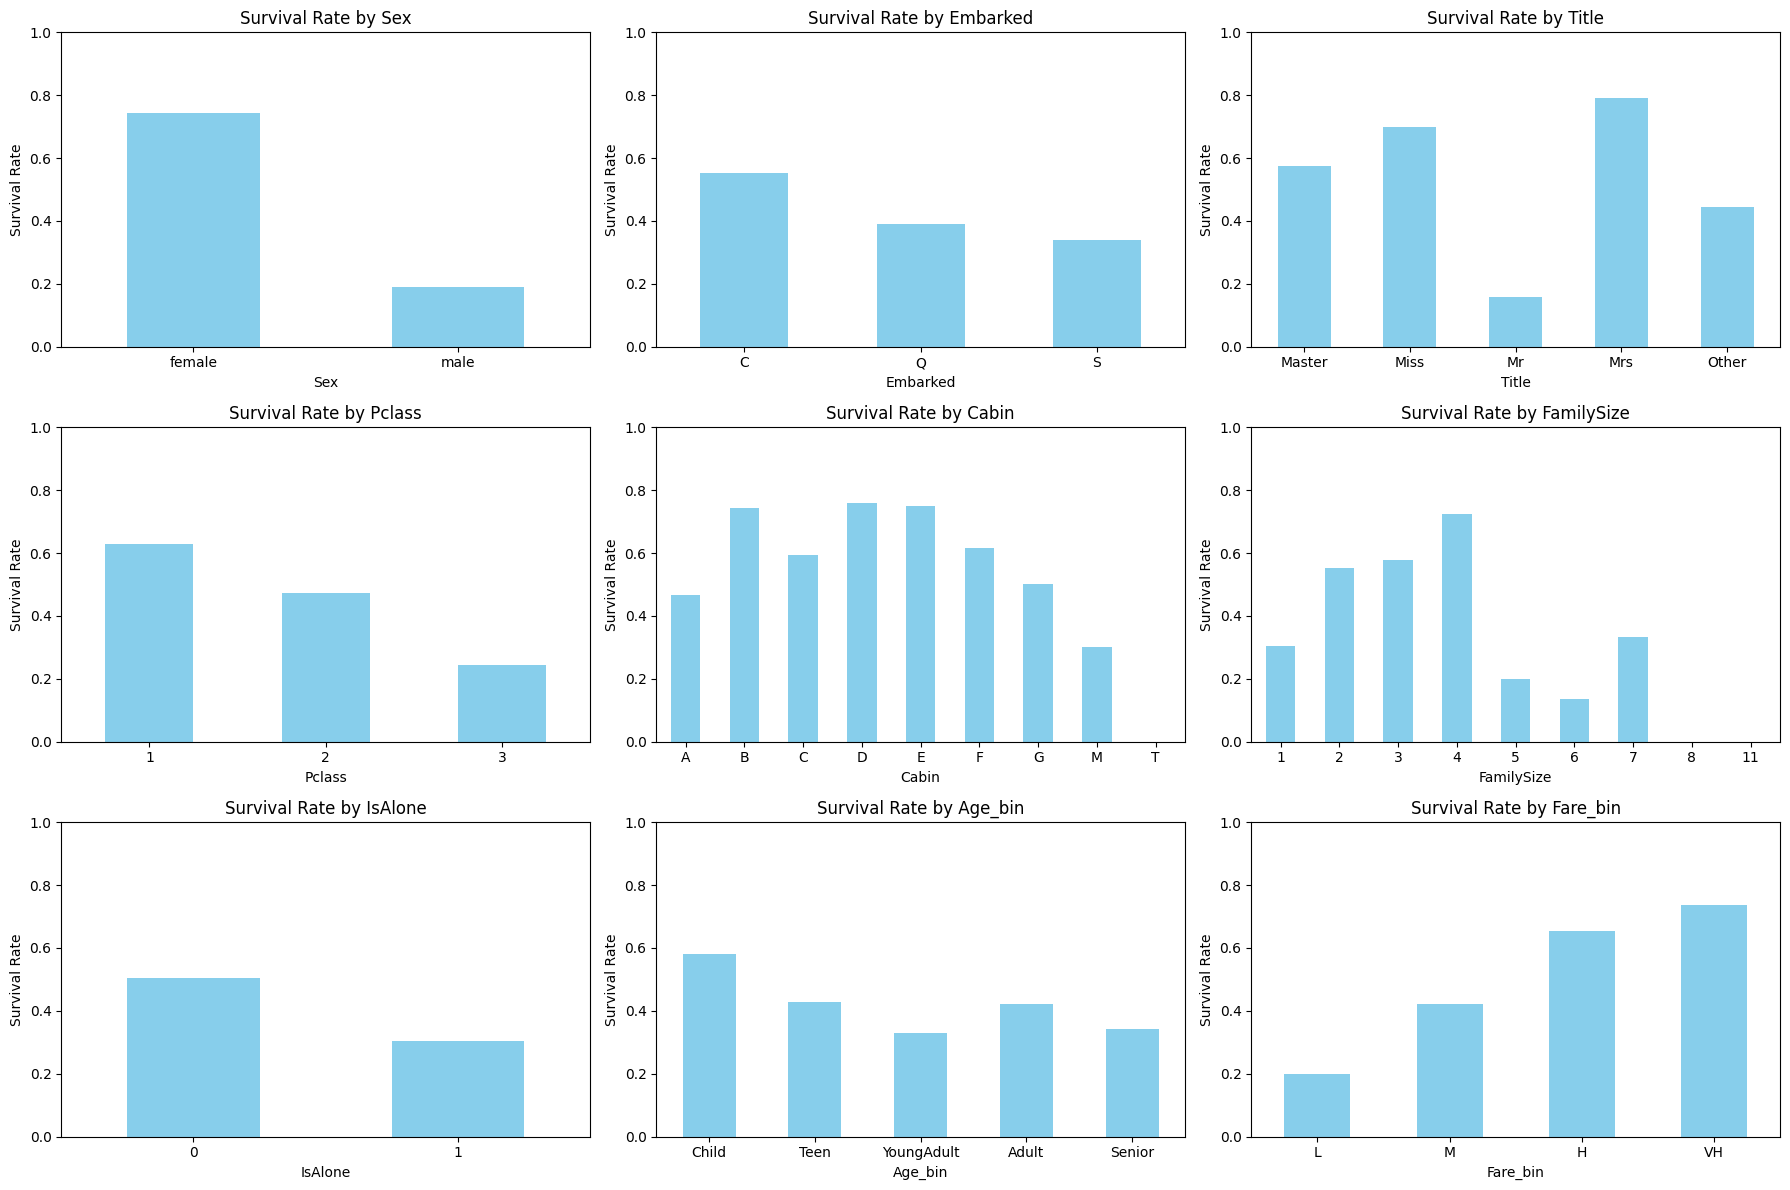

In [451]:
import matplotlib.pyplot as plt

print("[변수별 생존율 시각화]")

# 분석 대상 변수
analysis_cols = [
    "Sex", "Embarked", "Title", "Pclass", "Cabin",
    "FamilySize", "IsAlone", "Age_bin", "Fare_bin"
]

# 3행 3열 서브플롯 (총 9개 변수 시각화)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(analysis_cols):
    if col in df_prep.columns:
        survival_rate = df_prep.groupby(col, observed=True)["Survived"].mean()
        survival_rate.plot(kind="bar", ax=axes[i], rot=0, color="skyblue")
        axes[i].set_title(f"Survival Rate by {col}")
        axes[i].set_ylabel("Survival Rate")
        axes[i].set_ylim(0, 1)  # 비율이므로 0~1로 고정

plt.tight_layout()
plt.show()
